<a href="https://www.kaggle.com/code/notsau/tensorflow-with-kannada-mnist-data?scriptVersionId=161445357" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [8]:
import pandas as pd

# EDA

In [9]:
data = pd.read_csv("/kaggle/input/Kannada-MNIST/train.csv")

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Veri setinizin boyutu
total_samples = 42000

your_data = pd.read_csv("/kaggle/input/Kannada-MNIST/train.csv")

# Veri setinin indekslerini sıfırlama ve karıştırma
shuffled_data = your_data.sample(frac=1, random_state=42)

# Veri setini train ve test olarak ayırma
train, test = train_test_split(shuffled_data, test_size=1/3, random_state=42)

In [11]:
test

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
31309,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1236,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32047,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6082,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10927,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25883,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44129,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3725,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train.shape

(40000, 785)

In [13]:
test.shape

(20000, 785)

# Feature Engineering

In [14]:
train_images = train.drop("label", axis=1).values
train_labels = train["label"].values

test_images = test.drop("label", axis=1).values
test_labels = test["label"].values

train_images=train_images/255.0
test_images=test_images/255.0

In [15]:
train_images = train_images.reshape(40000, 784)
test_images = test_images.reshape(20000, 784)
test_images = test_images.astype("float32")
train_images = train_images.astype("float32")

# Modelling

In [16]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = "relu", input_shape =(784,)),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")])
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, batch_size = 120, epochs=40, verbose = 1, validation_data = (test_images, test_labels))










Epoch 1/40







334/334 [==============================] - 2s 3ms/step - loss: 0.3488 - accuracy: 0.9070 - val_loss: 0.1193 - val_accuracy: 0.9650

Epoch 2/40

334/334 [==============================] - 1s 2ms/step - loss: 0.1002 - accuracy: 0.9704 - val_loss: 0.0872 - val_accuracy: 0.9738

Epoch 3/40

334/334 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9779 - val_loss: 0.0772 - val_accuracy: 0.9774

Epoch 4/40

334/334 [==============================] - 1s 2ms/step - loss: 0.0568 - accuracy: 0.9834 - val_loss: 0.0684 - val_accuracy: 0.9796

Epoch 5/40

334/334 [==============================] - 1s 2ms/step - loss: 0.0447 - accuracy: 0.9870 - val_loss: 0.0637 - val_accuracy: 0.9801

Epoch 6/40

334/334 [==============================] - 1s 2ms/step - loss: 0.0359 - accuracy: 0.9894 - val_loss: 0.0604 - val_accuracy: 0.9817

Epoch 7/40

334/334 [==============================] - 1s 2ms/step - loss: 0.0281 - accuracy: 0.9916 - val_loss: 0.0599 -

In [17]:
_, accuracy=model.evaluate(test_images, test_labels)
print("Accuracy =  %2f" % (accuracy*100))

625/625 [==============================] - 1s 1ms/step - loss: 0.0882 - accuracy: 0.9853

Accuracy =  98.530000


In [18]:
import matplotlib.pyplot as plt

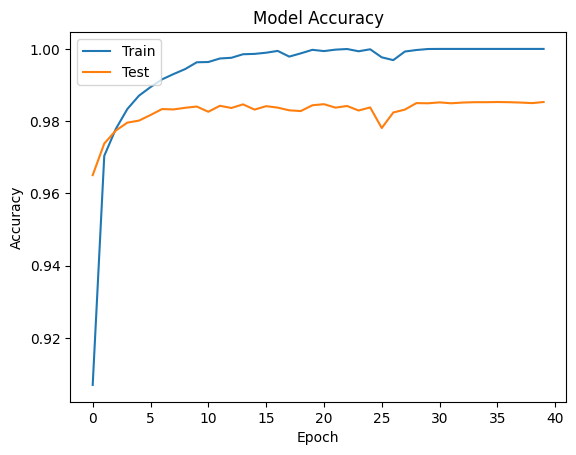

In [19]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()